# Comparing KNN vs MBR Spatial Range

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [2]:
all_snaps = {}
exps = [
    'query_snapshot', 
    'FAST_KNN_NO_ObjIndex_Snapshot',
    'FAST_KNN_NO_ObjIndex_onlyTrie_Snapshot',
    'FAST_KNN_NO_Snapshot',
    'FAST_KNN_NO_onlyTrie_Snapshot',
    # 'FAST_KNN_NO_OriThresh_Snapshot', 'FAST_KNN_NO_OriThresh_NoPreObj_Snapshot'
]
for name in exps:
    snaps = []
    for i in range(5):
        snap = pd.read_csv(f'../results/{name}_{i}.csv')
        snap['name'] = name;
        snap['timestamp'] = i * 25000
        snaps.append(snap)

    snaps = pd.concat(snaps)
    snaps['ar'] = snaps['ar'].apply(lambda x: 512 if x > 512 else x)
    all_snaps[name] = snaps

## Plot

/var/folders/dv/1pwqrs8j4kjghlrb3gc0b0_m0000gp/T/ipykernel_82206/4067266581.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated 

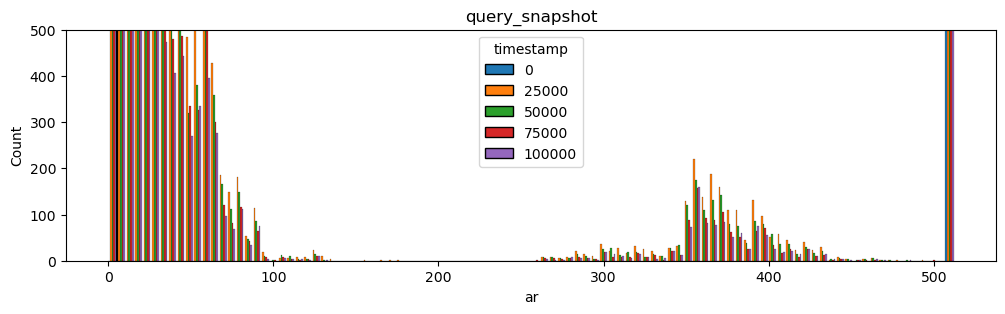

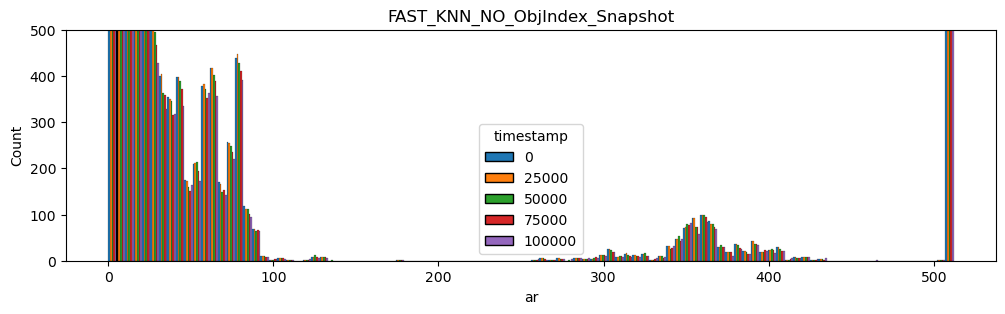

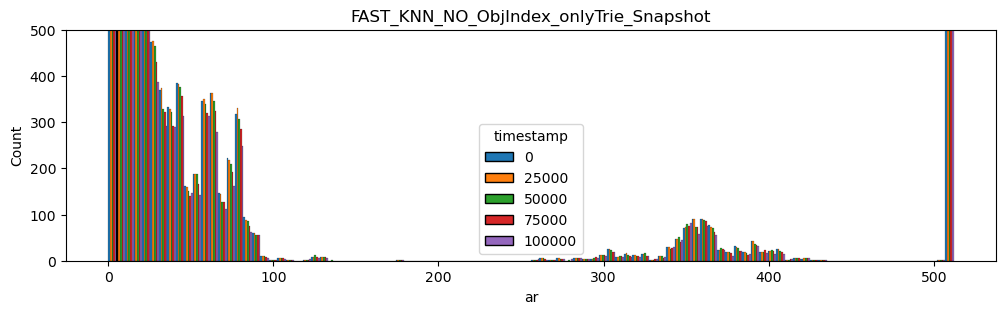

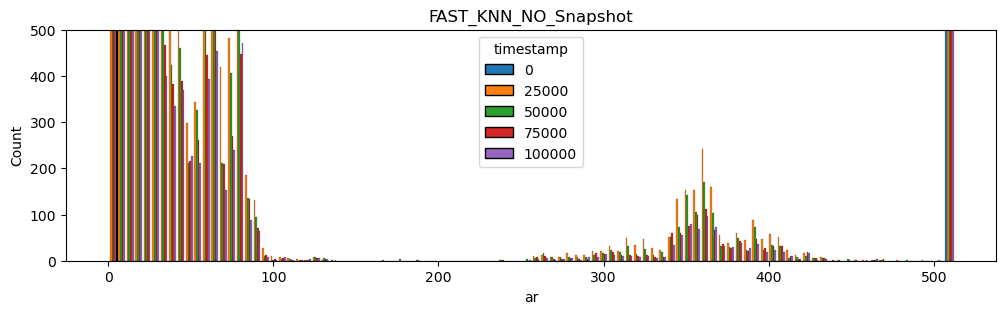

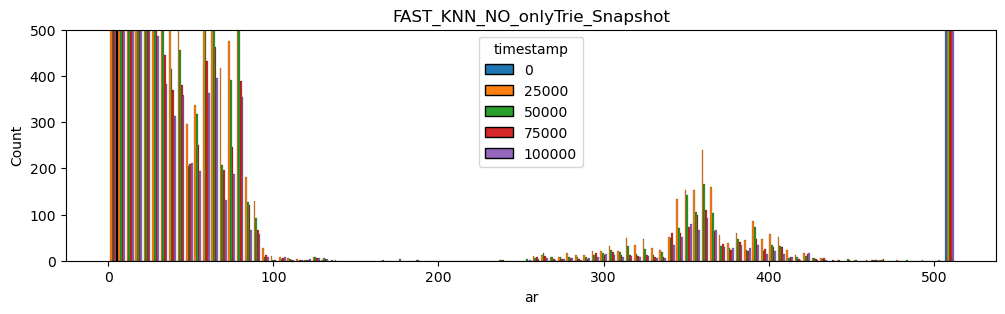

In [7]:
with pd.option_context('mode.use_inf_as_na', True):
    for name, snaps in all_snaps.items():
        plt.figure(figsize=(12, 3))
        sns.histplot(x='ar', hue='timestamp', bins=100, data=snaps, alpha=1, multiple='dodge', palette=sns.color_palette("tab10"), legend=True)
        plt.axvline(x=(512 * 0.01), color='black')
        plt.title(name)
        plt.ylim(0, 500)

/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/dv/1pwqrs8j4kjghlrb3gc0b0_m0000gp/T/ipykernel_82206/2894438632.py:3: UserWarning: The palette list has more values (10) than need

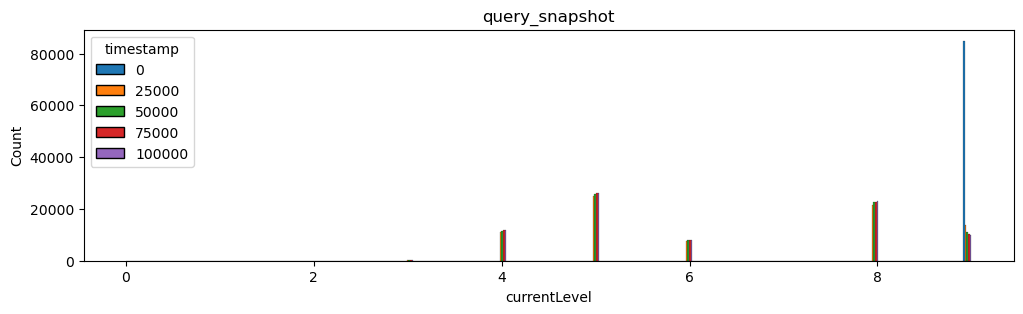

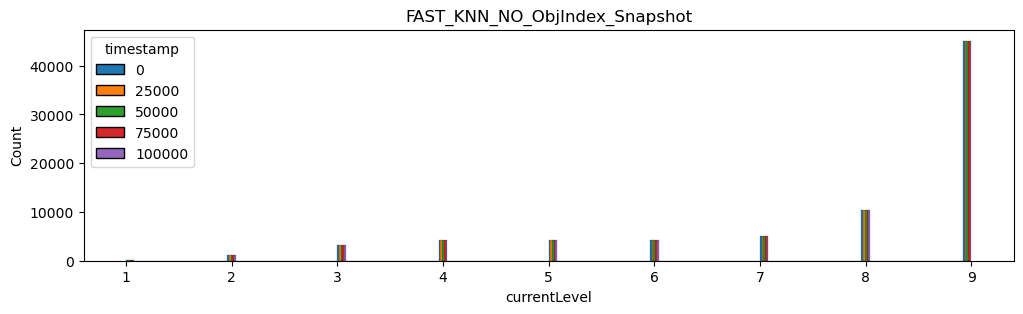

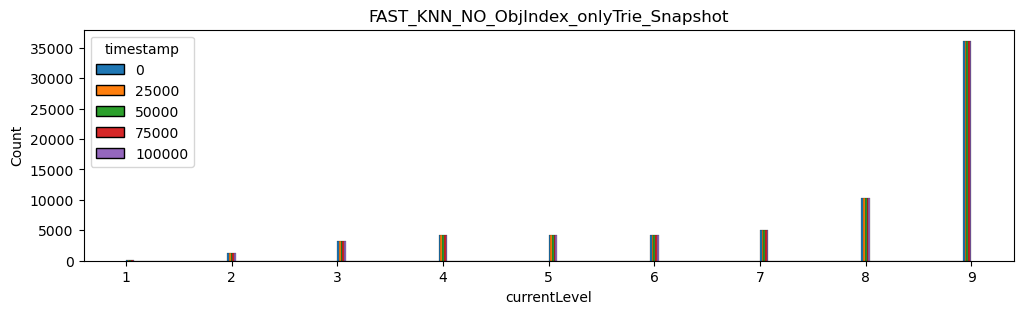

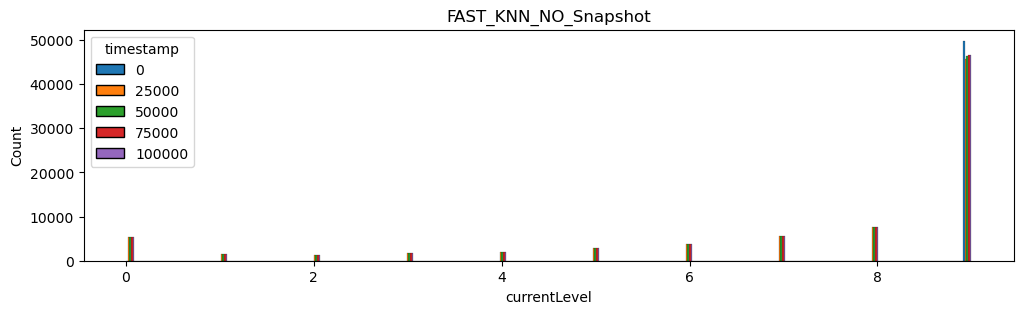

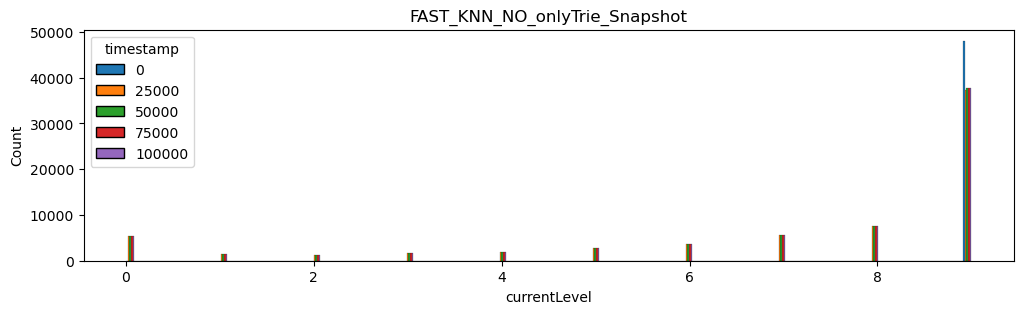

In [4]:
for name, snaps in all_snaps.items():
    plt.figure(figsize=(12, 3))
    sns.histplot(x='currentLevel', hue='timestamp', bins=100, data=snaps, alpha=1, multiple='dodge', palette=sns.color_palette("tab10"), legend=True)
    plt.title(name);
    # plt.axvline(x=(512 * 0.01), color='black')
    # plt.ylim(0, 5000)

In [5]:
first = all_snaps[exps[1]]
first[first['timestamp'] == 50000].shape

(77919, 7)